## Packages

In [53]:
import pandas as pd
import numpy as np
import biogeme.database as db  
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable, log, Derive
import biogeme.results as res 
from biogeme import models, tools
import matplotlib.pyplot as plt
import seaborn as sns

d:\Program Files (x86)\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data formatting

In [81]:
# Read the data
df = pd.read_csv('dataset.csv')

In [82]:
df['travel_mode'].value_counts()

drive    35808
pt       28605
walk     14268
cycle     2405
Name: travel_mode, dtype: int64

In [83]:
df['choice'] = df['travel_mode'].astype('category').cat.codes

for elem in set(df["purpose"]):
    df[elem] = np.where(df["purpose"]==elem,1,0)

for elem in set(df["fueltype"]):
    df[elem] = np.where(df["fueltype"]==elem,1,0)

for elem in set(df["faretype"]):
    df[elem] = np.where(df["faretype"]==elem,1,0)

df.drop('faretype',inplace=True,axis=1)
df.drop('purpose',inplace=True,axis=1)
df.drop('fueltype',inplace=True,axis=1)
df.drop('travel_mode',inplace=True,axis=1)

In [84]:
df['choice'].value_counts()

1    35808
2    28605
3    14268
0     2405
Name: choice, dtype: int64

In [85]:
# Specify the intervals for the trunks
bins = [5, 15, 30, 50, 99]

# Divide the ages into the specified trunks
trunks = pd.cut(df['age'], bins)

# Add the trunks as a new column to the dataframe
df['age_trunks'] = trunks


for elem in set(df["age_trunks"]):
  df[elem] = np.where(df["age_trunks"]== elem,1,0)

In [86]:
df.drop('age', inplace = True, axis = 1)
df.drop('age_trunks', inplace = True, axis = 1)

In [92]:
df.columns.values[49]

'age3'

In [91]:
#age category 
df.columns.values[49] = 'age3'
df.columns.values[50] = 'age2'
df.columns.values[51] = 'age1'
df.columns.values[52] = 'age4'

In [93]:
database = db.Database('dataset', df)
globals().update(database.variables)

In [94]:
df

,trip_id,household_id,person_n,trip_n,bus_scale,survey_year,travel_year,travel_month,travel_date,day_of_week,...,full,16+,child,dis,free,NaN,age3,age2,age1,age4
0,0,0,0,0,1.0,1,2012,4,1,7,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,1,1.0,1,2012,4,1,7,...,1,0,0,0,0,0,0,0,0,1
2,2,0,0,2,1.0,1,2012,4,1,7,...,1,0,0,0,0,0,0,0,0,1
3,3,0,0,3,1.0,1,2012,4,1,7,...,1,0,0,0,0,0,0,0,0,1
4,4,0,1,2,1.0,1,2012,4,1,7,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81081,81081,17615,0,0,1.0,3,2015,3,31,2,...,1,0,0,0,0,0,0,1,0,0
81082,81082,17615,0,2,1.0,3,2015,3,31,2,...,1,0,0,0,0,0,0,1,0,0
81083,81083,17615,0,3,1.0,3,2015,3,31,2,...,1,0,0,0,0,0,0,1,0,0
81084,81084,17615,1,0,1.0,3,2015,3,31,2,...,1,0,0,0,0,0,0,1,0,0


# Question 1

In [14]:
ASC_cycling = Beta('ASC_cycling',0,None,None,0)
ASC_driving = Beta('ASC_driving',0,None,None,0)
ASC_pt = Beta('ASC_pt',0,None,None,0)
B_time_1 = Beta('B_time_1',0,None,None,0)
B_time_2 = Beta('B_time_2',0,None,None,0)
B_time_3 = Beta('B_time_3',0,None,None,0)
B_time_4 = Beta('B_time_4',0,None,None,0)
B_cost = Beta('B_cost',0,None,None,0)

V0 = ASC_cycling + B_time_1 * dur_cycling
V1 = ASC_driving + B_time_2 * dur_driving + B_cost * cost_driving_total
V2 = ASC_pt + B_time_3 * dur_pt_total + B_cost * cost_transit
V3 = B_time_4 * dur_walking

V_1 = {0:V0, 1:V1, 2:V2, 3:V3}
av_1 = {0:1, 1:1, 2:1, 3:1}

In [15]:
logprob = models.loglogit(V_1,av_1,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='Question 1'
results_1 = biogeme.estimate()

[15:07:14] < Warning >   Cannot read file __Question 1.iter. Statement is ignored.


In [16]:
# Print the estimated values
# betas = results_1.getBetaValues()
# for k,v in betas.items():
#     print(f"{k:10}=\t{v:.3g}")

# Get the results in a pandas table
pandasResults = results_1.getEstimatedParameters()
print(pandasResults)
print('-----------------------------------')
final_LL_1 = results_1.data.logLike
print(f'Final Loglikelihood: {final_LL_1}')

                Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_cycling -4.691636      0.049210   -95.339155           0.0
ASC_driving -1.936221      0.033651   -57.539003           0.0
ASC_pt      -2.376346      0.034034   -69.821689           0.0
B_cost      -0.156509      0.003742   -41.822717           0.0
B_time_1    -5.371903      0.116441   -46.134123           0.0
B_time_2    -6.130450      0.093605   -65.492976           0.0
B_time_3    -3.287758      0.060483   -54.358031           0.0
B_time_4    -8.263970      0.102300   -80.782034           0.0
-----------------------------------
Final Loglikelihood: -69855.2816822978


# Question 2

In [17]:
dur_cyc_mean = np.mean(database.data["dur_cycling"])
dur_driving_mean = np.mean(database.data["dur_driving"])
dur_walking_mean = np.mean(database.data["dur_walking"])
dur_pt_total_mean = np.mean(database.data["dur_pt_total"])
cost_driving_total_mean = np.mean(database.data["cost_driving_total"])
cost_transit_mean = np.mean(database.data["cost_transit"])

In [18]:
ASC_cycling=	-4.69
ASC_driving=	-1.94
ASC_pt    =	-2.38
B_cost    =	-0.157
B_time_1  =	-5.37
B_time_2  =	-6.13
B_time_3  =	-3.29
B_time_4  =	-8.26

V0 = ASC_cycling + B_time_1 * dur_cyc_mean
V1 = ASC_driving + B_time_2 * dur_driving_mean + B_cost * cost_driving_total_mean
V2 = ASC_pt + B_time_3 * dur_pt_total_mean + B_cost * cost_transit_mean
V3 = B_time_4 * dur_walking_mean

P_car=np.exp(V1)/(np.exp(V1)+np.exp(V2)+np.exp(V3)+np.exp(V0))
print(f'Market share for car: {P_car}')

Market share for car: 0.5267201770332014


In [19]:
obs = df[df['choice'] == 1]['choice'].count() / df['choice'].count()
print(f'Observed market share for car: {obs}')

Observed market share for car: 0.4416052092839701


Difference is due to aggregation bias

# Question 3

In [20]:
B_time = Beta('B_time',0,None,None,0)

ASC_cycling = Beta('ASC_cycling',0,None,None,0)
ASC_driving = Beta('ASC_driving',0,None,None,0)
ASC_pt = Beta('ASC_pt',0,None,None,0)
B_cost = Beta('B_cost',0,None,None,0)

V0 = ASC_cycling + B_time * dur_cycling
V1 = ASC_driving + B_time * dur_driving + B_cost * cost_driving_total
V2 = ASC_pt + B_time * dur_pt_total + B_cost * cost_transit
V3 = B_time * dur_walking

V_3 = {0:V0, 1:V1, 2:V2, 3:V3}
av_3 = {0:1, 1:1, 2:1, 3:1}

In [21]:
logprob = models.loglogit(V_3,av_3,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='Question 3'
results_3 = biogeme.estimate()

[15:07:27] < Warning >   Cannot read file __Question 3.iter. Statement is ignored.


In [22]:
# Get the results in a pandas table
pandasResults = results_3.getEstimatedParameters()
print(pandasResults)
print('-----------------------------------')
final_LL_3 = results_3.data.logLike
print(f'Final Loglikelihood: {final_LL_3}')

                Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_cycling -3.798182      0.026404  -143.847213           0.0
ASC_driving -1.223659      0.019711   -62.080778           0.0
ASC_pt      -0.501474      0.013372   -37.501166           0.0
B_cost      -0.171316      0.003359   -51.000954           0.0
B_time      -5.311199      0.049513  -107.269809           0.0
-----------------------------------
Final Loglikelihood: -74975.45789551054


# Question 4

### Model Q1 (different B_time)

In [23]:
prob1_0 = models.logit(V_1,av_1,0)
prob1_1 = models.logit(V_1,av_1,1)
prob1_2 = models.logit(V_1,av_1,2)
prob1_3 = models.logit(V_1,av_1,3)

simulate_4_1 = {'Prob. 0': prob1_0,
            'Prob. 1': prob1_1,
            'Prob. 2': prob1_2,
            'Prob. 3': prob1_3}

In [24]:
biogeme = bio.BIOGEME (database, simulate_4_1)
biogeme.modelName='Question 1'

# Read the estimation results from the file
results_4_1 = res.bioResults(pickleFile='Question 1.pickle')
betaValues = results_4_1.getBetaValues()
sol_4_1 = biogeme.simulate(betaValues)

In [25]:
print(sol_4_1.describe())
print('-----------------------------------------')

# example for market share value extraction
marketShare_1 = sol_4_1['Prob. 1'].mean()
print(f'Average market share of driving: {marketShare_1}')

            Prob. 0       Prob. 1       Prob. 2       Prob. 3
count  8.108600e+04  81086.000000  81086.000000  8.108600e+04
mean   2.965961e-02      0.441605      0.352773  1.759621e-01
std    1.575301e-02      0.211137      0.230425  2.275397e-01
min    6.124956e-07      0.000095      0.001490  1.671864e-29
25%    1.914114e-02      0.283292      0.191897  1.715852e-04
50%    2.858984e-02      0.466205      0.280373  3.947850e-02
75%    3.773860e-02      0.601589      0.418379  3.323864e-01
max    1.973816e-01      0.994742      0.999711  8.864650e-01
-----------------------------------------
Average market share of driving: 0.44160492609046365


### Model Q3 (same B_time)

In [26]:
prob3_0 = models.logit(V_3,av_3,0)
prob3_1 = models.logit(V_3,av_3,1)
prob3_2 = models.logit(V_3,av_3,2)
prob3_3 = models.logit(V_3,av_3,3)

simulate_4_3 = {'Prob. 0': prob3_0,
            'Prob. 1': prob3_1,
            'Prob. 2': prob3_2,
            'Prob. 3': prob3_3}

In [27]:
biogeme = bio.BIOGEME (database, simulate_4_3)
biogeme.modelName='Question 3'

# Read the estimation results from the file
results_4_3 = res.bioResults(pickleFile='Question 3.pickle')
betaValues = results_4_3.getBetaValues()
sol_4_3 = biogeme.simulate(betaValues)

In [28]:
print(sol_4_3.describe())
print('-----------------------------------------')

# example for market share value extraction
marketShare_3 = sol_4_3['Prob. 1'].mean()
print(f'Average market share of driving: {marketShare_3}')

            Prob. 0       Prob. 1       Prob. 2       Prob. 3
count  81086.000000  81086.000000  81086.000000  8.108600e+04
mean       0.029660      0.441605      0.352774  1.759615e-01
std        0.017087      0.228523      0.190998  1.745902e-01
min        0.000002      0.001573      0.000031  5.990949e-18
25%        0.019862      0.270688      0.245378  6.525900e-03
50%        0.026543      0.405538      0.315316  1.192431e-01
75%        0.035640      0.605152      0.408967  3.311255e-01
max        0.397825      0.999723      0.997895  6.892725e-01
-----------------------------------------
Average market share of driving: 0.4416050861785839


# Question 5

In [29]:
chi = -2*(final_LL_3-final_LL_1)

a = tools.likelihood_ratio_test((final_LL_3,5), (final_LL_1,8), significance_level=0.05)

print(a)
print(chi)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=10240.352426425467, threshold=7.814727903251179)
10240.352426425467


Chisquare = 10240 for a variable difference of 3 (threshold at 7.815). With this result we can reject the hypothesis that  that the simple model (2) is equally good at explaining the data as the larger (1) model so we prefer the larger model 

# Question 6

In [95]:
B_time_1 = Beta('B_time_1',0,None,None,0)
B_time_2 = Beta('B_time_2',0,None,None,0)
B_time_3 = Beta('B_time_3',0,None,None,0)
B_time_4 = Beta('B_time_4',0,None,None,0)

ASC_cycling = Beta('ASC_cycling',0,None,None,0)
ASC_driving = Beta('ASC_driving',0,None,None,0)
ASC_pt = Beta('ASC_pt',0,None,None,0)
B_cost = Beta('B_cost',0,None,None,0)
B_age1_cycling = Beta('B_age1_cycling',0,None, None, 0)
B_age2_cycling = Beta('B_age2_cycling',0,None, None, 0)
B_age4_cycling = Beta('B_age4_cycling',0,None, None, 0)


B_age1_pt = Beta('B_age1_pt',0,None, None, 0)
B_age2_pt = Beta('B_age2_pt',0,None, None, 0)
B_age4_pt = Beta('B_age4_pt',0,None, None, 0)


B_age1_walk = Beta('B_age1_walk',0,None, None, 0)
B_age2_walk = Beta('B_age2_walk',0,None, None, 0)
B_age4_walk = Beta('B_age4_walk',0,None, None, 0)

V0 = ASC_cycling + B_time_1 * dur_cycling + B_age1_cycling * age1 + B_age2_cycling * age2  + B_age4_cycling * age4
V1 = ASC_driving + B_time_2 * dur_driving + B_cost * cost_driving_total
V2 = ASC_pt + B_time_3 * dur_pt_total + B_cost * cost_transit + B_age1_pt * age1 + B_age2_pt * age2  + B_age4_pt * age4
V3 = B_time_4 * dur_walking + B_age1_walk * age1 + B_age2_walk * age2  + B_age4_walk * age4

V_6 = {0:V0, 1:V1, 2:V2, 3:V3}
av_6 = {0:1, 1:1, 2:1, 3:1}

In [96]:
logprob = models.loglogit(V_6,av_6,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='Question 6'
results_6 = biogeme.estimate()

[16:34:28] < Warning >   Cannot read file __Question 6.iter. Statement is ignored.


In [97]:
# Get the results in a pandas table
pandasResults = results_6.getEstimatedParameters()
print(pandasResults)
print('-----------------------------------')
final_LL_6 = results_6.data.logLike
print(f'Final Loglikelihood: {final_LL_6}')

                   Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_cycling    -4.484945      0.055625   -80.628523  0.000000e+00
ASC_driving    -1.910786      0.037194   -51.372811  0.000000e+00
ASC_pt         -2.504322      0.037997   -65.908395  0.000000e+00
B_age1_cycling -0.644767      0.085560    -7.535841  4.862777e-14
B_age1_pt       0.124363      0.030860     4.029948  5.578929e-05
B_age1_walk     0.062272      0.036654     1.698914  8.933540e-02
B_age2_cycling  0.530066      0.052706    10.057114  0.000000e+00
B_age2_pt       0.929337      0.024416    38.061965  0.000000e+00
B_age2_walk     0.972269      0.034607    28.094559  0.000000e+00
B_age4_cycling -0.557837      0.056350    -9.899575  0.000000e+00
B_age4_pt      -0.019076      0.022320    -0.854651  3.927443e-01
B_age4_walk    -0.319215      0.029185   -10.937632  0.000000e+00
B_cost         -0.159167      0.003925   -40.551812  0.000000e+00
B_time_1       -5.532291      0.118967   -46.502699  0.000000e+00
B_time_2  

The final LL is -68560.97, and B_age4_cycling = -0.557837.  This mean that the oldest individuals (from 50 to 99 years old) prefer car over bike, compared to group 3.

# Question 7

In [98]:
Test2 = -2*(final_LL_1 -final_LL_6)
print(Test2)

a = tools.likelihood_ratio_test((final_LL_1,8), (final_LL_6,17), significance_level=0.05)

print(a)

2588.6094704792777
LRTuple(message='H0 can be rejected at level 5.0%', statistic=2588.6094704792777, threshold=16.918977604620448)


The likelihood ratio test give a chi square of 2588 for 9 variables difference (the threshold is 16.919). With this result we can reject the hypothesis that that the simple model (Q1) is equally good at explaining the data as the larger model (Q6) so we prefer the larger model. Indeed, it illustrates that the age parameter is determinant in choosing the transport modes.

# Question 8

No coding, see report (+ Antoine's written pdf file)

# Question 9

### Function 1 (linear utilities)

In [34]:
b_0_cycling = Beta('b_0_cycling',0,None,None,0)
b_0_driving = Beta('b_0_driving',0,None,None,0)
b_0_pt = Beta('b_0_pt',0,None,None,0)

b_2 = Beta('b_2',0,None,None,0)
b_3 = Beta('b_3',0,None,None,0)

V0 = b_0_cycling + b_3 * dur_cycling 
V1 = b_0_driving + b_3 * dur_driving  + b_2 * cost_driving_total
V2 = b_0_pt + b_3 * dur_pt_total + b_2 * cost_transit
V3 = b_3 * dur_walking

V_9_1 = {0:V0, 1:V1, 2:V2, 3:V3}
av_9_1 = {0:1, 1:1, 2:1, 3:1}

In [35]:
logprob = models.loglogit(V_9_1,av_9_1,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='Question 9_1'
results_9_1 = biogeme.estimate()

[15:08:57] < Warning >   Cannot read file __Question 9_1.iter. Statement is ignored.


In [36]:
# Get the results in a pandas table
pandasResults = results_9_1.getEstimatedParameters()
print(pandasResults)

final_LL_9_1 = results_9_1.data.logLike
print(f'Final Loglikelihood: {final_LL_9_1}')

                Value  Rob. Std err  Rob. t-test  Rob. p-value
b_0_cycling -3.798182      0.026404  -143.847213           0.0
b_0_driving -1.223659      0.019711   -62.080778           0.0
b_0_pt      -0.501474      0.013372   -37.501166           0.0
b_2         -0.171316      0.003359   -51.000954           0.0
b_3         -5.311199      0.049513  -107.269809           0.0
Final Loglikelihood: -74975.45789551054


### Function 2 (log utilities)

In [37]:
b_0_cycling = Beta('b_0_cycling',0,None,None,0)
b_0_driving = Beta('b_0_driving',0,None,None,0)
b_0_pt = Beta('b_0_pt',0,None,None,0)

b_2 = Beta('b_2',0,None,None,0)
b_3 = Beta('b_3',0,None,None,0)

EPSILON = 0.01

V0 = b_0_cycling + b_3 * log(dur_cycling)
V1 = b_0_driving + b_3 * log(dur_driving)+ b_2 * log(cost_driving_total + EPSILON)
V2 = b_0_pt + b_3 * log(dur_pt_total) + b_2 * log(cost_transit + EPSILON)
V3 = b_3 * log(dur_walking)

V_9_2 = {0:V0, 1:V1, 2:V2, 3:V3}
av_9_2 = {0:1, 1:1, 2:1, 3:1}

In [38]:
logprob = models.loglogit(V_9_2,av_9_2,choice)
biogeme = bio.BIOGEME (database, logprob)
biogeme.modelName='Question 9_2'
results_9_2 = biogeme.estimate()

[15:09:06] < Warning >   Cannot read file __Question 9_2.iter. Statement is ignored.


In [39]:
# Get the results in a pandas table
pandasResults = results_9_2.getEstimatedParameters()
print(pandasResults)

final_LL_9_2 = results_9_2.data.logLike
print(f'Final Loglikelihood: {final_LL_9_2}')

                Value  Rob. Std err  Rob. t-test  Rob. p-value
b_0_cycling -5.381949      0.035986  -149.555439           0.0
b_0_driving -3.144925      0.030063  -104.612784           0.0
b_0_pt      -1.445707      0.018449   -78.363482           0.0
b_2         -0.030807      0.003303    -9.327236           0.0
b_3         -3.204719      0.022288  -143.787858           0.0
Final Loglikelihood: -78081.10284920775


# Question 10

### Function 1

In [40]:
VOT_9_1 = results_9_1.data.betaValues[4] / results_9_1.data.betaValues[3]
print(f'Value of time: {VOT_9_1}')

Value of time: 31.002267605205727


Same for both alternatives because same specification

### Function 2

In [101]:
# VOT_9_2 = results_9_2.data.betaValues[4] / results_9_2.data.betaValues[3]
# print(f'Value of time: {VOT_9_2}')

VOT_9_2_car = ((results_9_2.data.betaValues[4]/df["dur_driving"])/(results_9_2.data.betaValues[3]/df["cost_driving_total"])).mean()
VOT_9_2_pt =((results_9_2.data.betaValues[4]/df["dur_pt_total"])/(results_9_2.data.betaValues[3]/df["cost_transit"])).mean()

print(f'Value of time car: {VOT_9_2_car:.3f}, pt: {VOT_9_2_pt:.3f}')

Value of time car: 660.050, pt: 427.484


Here specifications are different so we have two different VoT

# Question 11

### Function 1

In [42]:
#Calculation of probabilities
prob_0 = models.logit(V_9_1, av_9_1, 0)
prob_1 = models.logit(V_9_1, av_9_1, 1)
prob_2 = models.logit(V_9_1, av_9_1, 2)
prob_3 = models.logit(V_9_1, av_9_1, 3)

elasdir_0_time = Derive(prob_0,'dur_cycling') * dur_cycling / prob_0 
elasdir_1_time = Derive(prob_1,'dur_driving') * dur_driving / prob_1 
elasdir_2_time = Derive(prob_2,'dur_pt_total') * dur_pt_total / prob_2 
elasdir_3_time = Derive(prob_3,'dur_walking') * dur_walking / prob_3 
elasdir_1_cost = Derive(prob_1,'cost_driving_total') * cost_driving_total / prob_1 
elasdir_2_cost = Derive(prob_2,'cost_transit') * cost_transit / prob_2 

elastcross_1_time = Derive(prob_1,'dur_pt_total') * dur_pt_total / prob_1 
elastcross_2_time = Derive(prob_2,'dur_driving') * dur_driving / prob_2 
elastcross_1_cost = Derive(prob_1,'cost_transit') * cost_transit / prob_1 
elastcross_2_cost = Derive(prob_2,'cost_driving_total') * cost_driving_total / prob_2 

simulate_11_1 = {
    'prob.0': prob_0,
    'prob.1': prob_1,
    'prob.2': prob_2,
    'prob.3': prob_3,
    'elasdir_0_time': elasdir_0_time,
    'elasdir_1_time': elasdir_1_time,
    'elasdir_2_time': elasdir_2_time,
    'elasdir_3_time': elasdir_3_time,
    'elasdir_1_cost': elasdir_1_cost,
    'elasdir_2_cost': elasdir_2_cost,
    'elascross_1_time': elastcross_1_time,
    'elascross_2_time': elastcross_2_time,
    'elascross_1_cost': elastcross_1_cost,
    'elascross_2_cost': elastcross_2_cost
}

biosim = bio.BIOGEME(database, simulate_11_1)
biosim.modelName = 'model1_directelasticity'

# Perform the simulation
simresults_11_1 = biosim.simulate(results_9_1.getBetaValues())

In [43]:
# Average Elast for the population
avg_Elast_time_0 = sum(simresults_11_1['elasdir_0_time']*simresults_11_1['prob.0']/(simresults_11_1['prob.0'].sum()))
avg_Elast_time_1 = sum(simresults_11_1['elasdir_1_time']*simresults_11_1['prob.1']/(simresults_11_1['prob.1'].sum()))
avg_Elast_time_2 = sum(simresults_11_1['elasdir_2_time']*simresults_11_1['prob.2']/(simresults_11_1['prob.2'].sum()))
avg_Elast_time_3 = sum(simresults_11_1['elasdir_3_time']*simresults_11_1['prob.3']/(simresults_11_1['prob.3'].sum()))
avg_Elast_cost_1 = sum(simresults_11_1['elasdir_1_cost']*simresults_11_1['prob.1']/(simresults_11_1['prob.1'].sum()))
avg_Elast_cost_2 = sum(simresults_11_1['elasdir_2_cost']*simresults_11_1['prob.2']/(simresults_11_1['prob.2'].sum()))

print(
f'Elasticity of the share of alternative 0 with respect to travel time: {avg_Elast_time_0:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel time: {avg_Elast_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time: {avg_Elast_time_2:.3f} \n'
f'Elasticity of the share of alternative 3 with respect to travel time: {avg_Elast_time_3:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost: {avg_Elast_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost: {avg_Elast_cost_2:.3f} \n')

# Average Elast for the population
avg_Elastcross_time_1 = sum(simresults_11_1['elascross_1_time']*simresults_11_1['prob.1']/(simresults_11_1['prob.1'].sum()))
avg_Elastcross_time_2 = sum(simresults_11_1['elascross_2_time']*simresults_11_1['prob.2']/(simresults_11_1['prob.2'].sum()))
avg_Elastcross_cost_1 = sum(simresults_11_1['elascross_1_cost']*simresults_11_1['prob.1']/(simresults_11_1['prob.1'].sum()))
avg_Elastcross_cost_2 = sum(simresults_11_1['elascross_2_cost']*simresults_11_1['prob.2']/(simresults_11_1['prob.2'].sum()))



print(
f'Elasticity of the share of alternative 1 with respect to travel time of pt: {avg_Elastcross_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time of driving: {avg_Elastcross_time_2:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost of pt: {avg_Elastcross_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost driving: {avg_Elastcross_cost_2:.3f} \n')

Elasticity of the share of alternative 0 with respect to travel time: -1.717 
Elasticity of the share of alternative 1 with respect to travel time: -0.594 
Elasticity of the share of alternative 2 with respect to travel time: -1.199 
Elasticity of the share of alternative 3 with respect to travel time: -1.388 
Elasticity of the share of alternative 1 with respect to travel cost: -0.093 
Elasticity of the share of alternative 2 with respect to travel cost: -0.130 

Elasticity of the share of alternative 1 with respect to travel time of pt: 0.743 
Elasticity of the share of alternative 2 with respect to travel time of driving: 0.580 
Elasticity of the share of alternative 1 with respect to travel cost of pt: 0.076 
Elasticity of the share of alternative 2 with respect to travel cost driving: 0.094 



### Function 2

In [44]:
#Calculation of probabilities
prob_0 = models.logit(V_9_2, av_9_2, 0)
prob_1 = models.logit(V_9_2, av_9_2, 1)
prob_2 = models.logit(V_9_2, av_9_2, 2)
prob_3 = models.logit(V_9_2, av_9_2, 3)

elasdir_0_time = Derive(prob_0,'dur_cycling') * dur_cycling / prob_0 
elasdir_1_time = Derive(prob_1,'dur_driving') * dur_driving / prob_1 
elasdir_2_time = Derive(prob_2,'dur_pt_total') * dur_pt_total / prob_2 
elasdir_3_time = Derive(prob_3,'dur_walking') * dur_walking / prob_3 
elasdir_1_cost = Derive(prob_1,'cost_driving_total') * cost_driving_total / prob_1 
elasdir_2_cost = Derive(prob_2,'cost_transit') * cost_transit / prob_2 

elastcross_1_time = Derive(prob_1,'dur_pt_total') * dur_pt_total / prob_1 
elastcross_2_time = Derive(prob_2,'dur_driving') * dur_driving / prob_2 
elastcross_1_cost = Derive(prob_1,'cost_transit') * cost_transit / prob_1 
elastcross_2_cost = Derive(prob_2,'cost_driving_total') * cost_driving_total / prob_2 

simulate_11_2 = {
    'prob.0': prob_0,
    'prob.1': prob_1,
    'prob.2': prob_2,
    'prob.3': prob_3,
    'elasdir_0_time': elasdir_0_time,
    'elasdir_1_time': elasdir_1_time,
    'elasdir_2_time': elasdir_2_time,
    'elasdir_3_time': elasdir_3_time,
    'elasdir_1_cost': elasdir_1_cost,
    'elasdir_2_cost': elasdir_2_cost,
    'elascross_1_time': elastcross_1_time,
    'elascross_2_time': elastcross_2_time,
    'elascross_1_cost': elastcross_1_cost,
    'elascross_2_cost': elastcross_2_cost
}

biosim = bio.BIOGEME(database, simulate_11_2)
biosim.modelName = 'model2_directelasticity'

# Perform the simulation
simresults_11_2 = biosim.simulate(results_9_2.getBetaValues())

In [45]:
# Average Elast for the population
avg_Elast_time_0 = sum(simresults_11_2['elasdir_0_time']*simresults_11_2['prob.0']/(simresults_11_2['prob.0'].sum()))
avg_Elast_time_1 = sum(simresults_11_2['elasdir_1_time']*simresults_11_2['prob.1']/(simresults_11_2['prob.1'].sum()))
avg_Elast_time_2 = sum(simresults_11_2['elasdir_2_time']*simresults_11_2['prob.2']/(simresults_11_2['prob.2'].sum()))
avg_Elast_time_3 = sum(simresults_11_2['elasdir_3_time']*simresults_11_2['prob.3']/(simresults_11_2['prob.3'].sum()))
avg_Elast_cost_1 = sum(simresults_11_2['elasdir_1_cost']*simresults_11_2['prob.1']/(simresults_11_2['prob.1'].sum()))
avg_Elast_cost_2 = sum(simresults_11_2['elasdir_2_cost']*simresults_11_2['prob.2']/(simresults_11_2['prob.2'].sum()))

print(
f'Elasticity of the share of alternative 0 with respect to travel time: {avg_Elast_time_0:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel time: {avg_Elast_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time: {avg_Elast_time_2:.3f} \n'
f'Elasticity of the share of alternative 3 with respect to travel time: {avg_Elast_time_3:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost: {avg_Elast_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost: {avg_Elast_cost_2:.3f} \n')

# Average Elast for the population
avg_Elastcross_time_1 = sum(simresults_11_2['elascross_1_time']*simresults_11_2['prob.1']/(simresults_11_2['prob.1'].sum()))
avg_Elastcross_time_2 = sum(simresults_11_2['elascross_2_time']*simresults_11_2['prob.2']/(simresults_11_2['prob.2'].sum()))
avg_Elastcross_cost_1 = sum(simresults_11_2['elascross_1_cost']*simresults_11_2['prob.1']/(simresults_11_2['prob.1'].sum()))
avg_Elastcross_cost_2 = sum(simresults_11_2['elascross_2_cost']*simresults_11_2['prob.2']/(simresults_11_2['prob.2'].sum()))



print(
f'Elasticity of the share of alternative 1 with respect to travel time of pt: {avg_Elastcross_time_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel time of driving: {avg_Elastcross_time_2:.3f} \n'
f'Elasticity of the share of alternative 1 with respect to travel cost of pt: {avg_Elastcross_cost_1:.3f} \n'
f'Elasticity of the share of alternative 2 with respect to travel cost driving: {avg_Elastcross_cost_2:.3f} \n')

Elasticity of the share of alternative 0 with respect to travel time: -3.045 
Elasticity of the share of alternative 1 with respect to travel time: -1.473 
Elasticity of the share of alternative 2 with respect to travel time: -1.614 
Elasticity of the share of alternative 3 with respect to travel time: -2.339 
Elasticity of the share of alternative 1 with respect to travel cost: -0.014 
Elasticity of the share of alternative 2 with respect to travel cost: -0.010 

Elasticity of the share of alternative 1 with respect to travel time of pt: 0.864 
Elasticity of the share of alternative 2 with respect to travel time of driving: 1.081 
Elasticity of the share of alternative 1 with respect to travel cost of pt: 0.006 
Elasticity of the share of alternative 2 with respect to travel cost driving: 0.010 



# Question 12

### Function 1

In [47]:
print(
    f"Standard deviation: {simresults_11_1['prob.2'].std()} \n"
    f"Min: {simresults_11_1['prob.2'].min()} \n"
    f"Max: {simresults_11_1['prob.2'].max()} \n"
    f"Median: {simresults_11_1['prob.2'].quantile(0.5)} \n"
    f"Percentile 10%: {simresults_11_1['prob.2'].quantile(0.1)} \n"
    f"Percentile 90%: {simresults_11_1['prob.2'].quantile(0.9)} \n"
)

Standard deviation: 0.1909984709559172 
Min: 3.0801171313479446e-05 
Max: 0.9978948965312956 
Median: 0.31531609763731605 
Percentile 10%: 0.15477389454613039 
Percentile 90%: 0.6214862429082637 



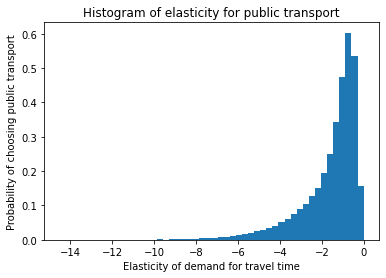

In [102]:
plt.hist(simresults_11_1['elasdir_2_time'], bins=50, density=True)
plt.xlabel('Elasticity of demand for travel time')
plt.ylabel('Probability of choosing public transport')
plt.title('Histogram of elasticity for public transport')
plt.show()

### Function 2

In [ ]:
print(
    f"Standard deviation: {simresults_11_2['prob.2'].std()} \n"
    f"Min: {simresults_11_2['prob.2'].min()} \n"
    f"Max: {simresults_11_2['prob.2'].max()} \n"
    f"Median: {simresults_11_2['prob.2'].quantile(0.5)} \n"
    f"Percentile 10%: {simresults_11_2['prob.2'].quantile(0.1)} \n"
    f"Percentile 90%: {simresults_11_2['prob.2'].quantile(0.9)} \n"
)

Standard deviation: 0.22503244452704896 
Min: 8.45717680983052e-09 
Max: 0.9979039397112144 
Median: 0.2950320580113267 
Percentile 10%: 0.10642164475209079 
Percentile 90%: 0.7177318020632331 



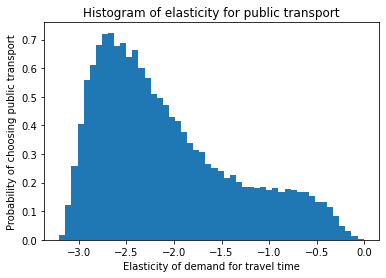

In [103]:
plt.hist(simresults_11_2['elasdir_2_time'], bins=50, density=True)
plt.xlabel('Elasticity of demand for travel time')
plt.ylabel('Probability of choosing public transport')
plt.title('Histogram of elasticity for public transport')
plt.show()

# Question 13

### Function 1

<function matplotlib.pyplot.show(close=None, block=None)>

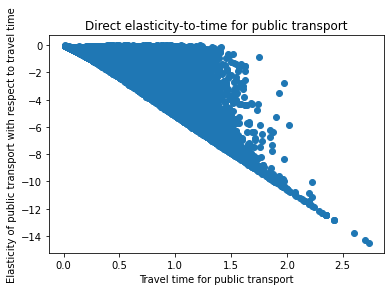

In [73]:
plt.scatter(df['dur_pt_total'],simresults_11_1['elasdir_2_time'])
plt.xlabel('Travel time for public transport')
plt.ylabel('Elasticity of public transport with respect to travel time')
plt.title('Direct elasticity-to-time for public transport')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

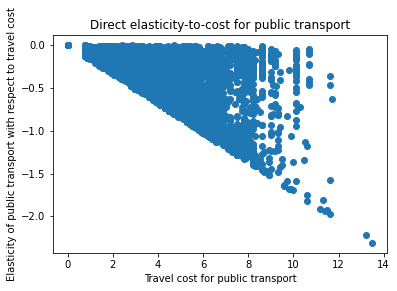

In [75]:
plt.scatter(df['cost_transit'],simresults_11_1['elasdir_2_cost'])
plt.xlabel('Travel cost for public transport')
plt.ylabel('Elasticity of public transport with respect to travel cost')
plt.title('Direct elasticity-to-cost for public transport')
plt.show

### Function 2

<function matplotlib.pyplot.show(close=None, block=None)>

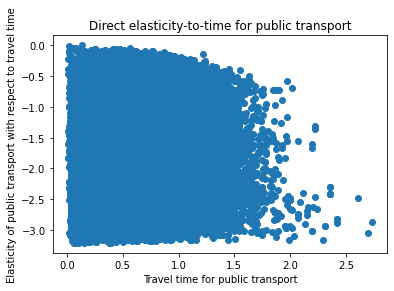

In [74]:
plt.scatter(df['dur_pt_total'],simresults_11_2['elasdir_2_time'])
plt.xlabel('Travel time for public transport')
plt.ylabel('Elasticity of public transport with respect to travel time')
plt.title('Direct elasticity-to-time for public transport')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

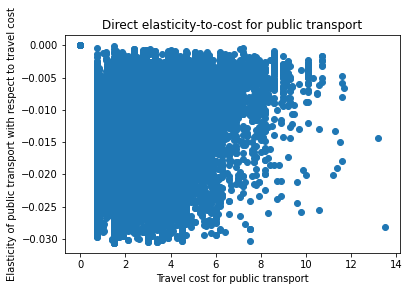

In [76]:
plt.scatter(df['cost_transit'],simresults_11_2['elasdir_2_cost'])
plt.xlabel('Travel cost for public transport')
plt.ylabel('Elasticity of public transport with respect to travel cost')
plt.title('Direct elasticity-to-cost for public transport')
plt.show